In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            if self.n_classes == 1:
              X[i,] = np.load('/content/gdrive/My Drive/Stress/Stress Data/fit/' + ID + '.npy')
            else:
              X[i,] = np.load('/content/gdrive/My Drive/Stress/Stress Data 2class/fit/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]

        if self.n_classes == 1:
          return X, y
        else:
          return X, keras.utils.to_categorical(y, num_classes=self.n_classes)    

class EvalDataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            if self.n_classes == 1:
              X[i,] = np.load('/content/gdrive/My Drive/Stress/Stress Data/eval/' + ID + '.npy')
            else:
              X[i,] = np.load('/content/gdrive/My Drive/Stress/Stress Data 2class/eval/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]

        if self.n_classes == 1:
          return X, y
        else:
          return X, keras.utils.to_categorical(y, num_classes=self.n_classes) 

**Regression**


---



---



In [ ]:
import numpy as np
from keras.models import Sequential
import json

with open('/content/gdrive/My Drive/Stress/Stress Data/labels_fit.json', 'r') as fp:
    labels_fit = json.load(fp)
with open('/content/gdrive/My Drive/Stress/Stress Data/partition_fit.json', 'r') as fp:
    partition_fit = json.load(fp)

with open('/content/gdrive/My Drive/Stress/Stress Data/labels_eval.json', 'r') as fp:
    labels_eval = json.load(fp)
with open('/content/gdrive/My Drive/Stress/Stress Data/partition_eval.json', 'r') as fp:
    partition_eval = json.load(fp)

with open('/content/gdrive/My Drive/Stress/Stress Data/IDInfo_fit.json', 'r') as fp:
    IDInfo_fit = json.load(fp)

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display
%matplotlib inline


y_eval = []

x_eval = np.empty((len(labels_eval), 5, 128, 128, 3))
count = 0
for key in labels_eval:
  y_eval.append(labels_eval[key])
  x_eval[count,] = np.load('/content/gdrive/My Drive/Stress/Stress Data/eval/' + key + '.npy')
  count += 1

In [ ]:
labelList = []
for key in labels_fit:
  labelList.append(labels_fit[key])
print(labelList)
print(len(labelList))

[4.91128609097999, 4.91128609097999, 4.91128609097999, 4.91128609097999, 4.91128609097999, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.571082391402633, 5.571082391402633, 5.571082391402633, 5.571082391402633, 5.571082391402633, 4.849408960020931, 4.849408960020931, 4.849408960020931, 4.849408960020931, 4.849408960020931, 4.620674813901767, 4.620674813901767, 4.620674813901767, 4.620674813901767, 4.620674813901767, 5.306877252259259, 5.306877252259259, 5.306877252259259, 5.306877252259259, 5.306877252259259, 4.391940667782603, 4.391940667782603, 4.391940667782603, 4.391940667782603, 4.391940667782603, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 5.430631514177377, 4.849408960020931, 4.849408960020931, 4.849408960020931, 4.849408960020931, 4.849408960020931, 6.1954076988010645, 6.1954076988010645, 6.195407698801

In [ ]:
labelList = []
for key in labels_eval:
  labelList.append(labels_eval[key])
print(labelList)
print(len(labelList))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization, Embedding, AveragePooling3D, ConvLSTM2D
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
from keras import backend as K



def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Parameters
params = {'dim': (5, 128, 128),
      'batch_size': 5,
      'n_classes': 1,
      'n_channels': 3,
      'shuffle': True}

# Generators
training_generator = DataGenerator(partition_fit['train'], labels_fit, **params)
validation_generator = DataGenerator(partition_fit['validation'], labels_fit, **params)
evaluation_generator = EvalDataGenerator(partition_eval['evaluate'], labels_eval, **params)

# for i in validation_generator.__getitem__(0)[0]:
#     for j in range(1, len(i)+1):
#       plt.subplot(1,5,j)
#       plt.imshow(i[j-1])
#       plt.show()

# print(training_generator.__getitem__(1))

In [ ]:
date = '26_8'
ver = '02'

input_shape = (5, 128, 128, 3)
num_classes = 1
model = Sequential()
model.add(Conv3D(4, kernel_size=(2, 3, 3), activation='relu', input_shape=input_shape)) # input shape only here
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Dropout(0.25)) # dropout = 0.25 is OK to start with
# model.add(BatchNormalization())
model.add(Conv3D(8, kernel_size=(1, 3, 3), activation='relu')) # kernel_size = (1, 3, 3)
model.add(MaxPooling3D(pool_size=(1, 2, 2))) # subsamples in x and y which will reduce parameters considerably at each layer
model.add(Dropout(0.25))
# model.add(BatchNormalization())
# model.add(Conv3D(8, kernel_size=(1, 3, 3), activation='relu'))
# model.add(MaxPooling3D(pool_size=(1, 2, 2)))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu')) # start with a small hidden layer
model.add(Dense(num_classes, activation='linear'))

model.summary() # check the numbers of parameters at each layers

my_lr = 1e-3


model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=my_lr), metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint(str("/content/gdrive/My Drive/Stress/Models/" + date +"_(" + ver + ")_best_model.h5"), monitor='val_loss', mode='min', verbose=1, save_best_only = True)



# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=False,
                    workers=6,
                    epochs = 100,
                    callbacks=[es, mc])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_22 (Conv3D)           (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d_22 (MaxPooling (None, 4, 63, 63, 4)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_23 (MaxPooling (None, 4, 30, 30, 8)      0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 4, 30, 30, 8)      0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 28800)           

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open(str("/content/gdrive/My Drive/Stress/Models/" + date +"_(" + ver + ")_best_model.json"), "w") as json_file:
    json_file.write(model_json)

Loaded model from disk
[1.3198728561401367, 1.3198728561401367, 0.8911468982696533, 19.34139633178711, 1.0]


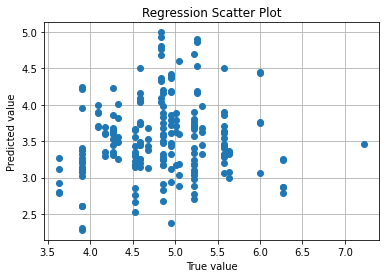

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


def plotTrPr(Y_test, Ypr):
    xline = range(0,math.floor(float(max(Y_test))))
    plt.figure()
    plt.plot(Y_test,Ypr,'o')
    plt.grid()
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title('Regression Scatter Plot')

# load json and create model
json_file = open("/content/gdrive/My Drive/Stress/Models/" + date +"_(" + ver + ")_best_model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/gdrive/My Drive/Stress/Models/" + date +"_(" + ver + ")_best_model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(), metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])
score = loaded_model.evaluate_generator(generator=evaluation_generator)
print(score)
Ypr = loaded_model.predict(x_eval)
plotTrPr(y_eval, Ypr)

In [ ]:
model.evaluate_generator(generator=evaluation_generator)

from sklearn.metrics import classification_report
import numpy as np

# print(x_eval)

y_pred = [item for sublist in model.predict(x_eval) for item in sublist]
print(y_pred)

[4.3069253, 4.4324846, 4.377378, 4.471, 4.701001, 4.659215, 5.0260115, 5.027435, 4.980811, 4.9917545, 5.191724, 5.136444, 5.2997866, 5.264979, 5.2652497, 5.070293, 3.738376, 4.1290393, 4.442445, 4.42003, 4.296686, 5.4820256, 5.3718963, 5.5028176, 5.6261964, 5.524343, 5.3858733, 5.4699826, 5.513147, 5.3299413, 5.354684, 5.401954, 5.371608, 5.2921033, 4.774378, 5.056259, 5.052393, 5.135876, 5.248553, 5.494858, 4.9034677, 4.5377946, 4.58689, 4.757559, 5.1468406, 4.4173574, 4.8056674, 4.984756, 5.0656433, 4.2311854, 4.417548, 5.5111327, 5.4341874, 5.298989, 5.1826973, 5.1068263, 5.046074, 5.4697504, 5.132581, 5.195427, 5.0139008, 4.433012, 4.9345684, 4.8301735, 5.074682, 5.1523523, 4.96492, 4.961873, 4.2780385, 4.416279, 4.5384, 5.239585, 5.295639, 5.3118114, 5.220855, 5.2795315, 5.195076, 5.4195714, 5.239914, 5.0269237, 5.233637, 4.402468, 4.83911, 4.6669993, 5.118727, 4.8735633, 4.5021033, 4.569943, 4.795511, 4.5362716, 4.621321, 4.778716, 4.653874, 4.766155, 4.4419184, 4.8193316, 4.8012

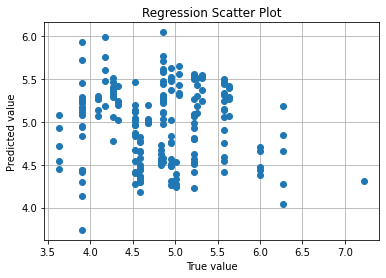

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import math
import matplotlib.pyplot as plt


def plotTrPr(Y_test, Ypr):
    xline = range(0,math.floor(float(max(Y_test))))
    plt.figure()
    plt.plot(Y_test,Ypr,'o')
    plt.grid()
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title('Regression Scatter Plot')

y_pred = [item for sublist in model.predict(x_eval) for item in sublist]
plotTrPr(y_eval, y_pred)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/gdrive/My Drive/Stress/Models/model_16_8(2).json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/Stress/Models/model_16_8(2).h5")
print("Saved model to disk")

Saved model to disk


Loaded model from disk


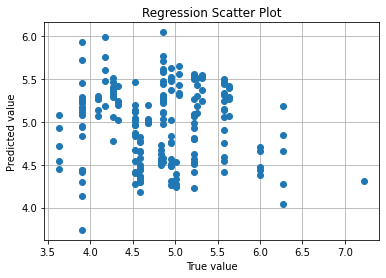

In [ ]:
# load json and create model
json_file = open('/content/gdrive/My Drive/Stress/Models/model_16_8(2).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/gdrive/My Drive/Stress/Models/model_16_8(2).h5")
print("Loaded model from disk")

loaded_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())
Ypr = loaded_model.predict(x_eval)
plotTrPr(y_eval, Ypr)

**2 Class**

---



---



In [ ]:
import numpy as np
from keras.models import Sequential
import json
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display
%matplotlib inline
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)


with open('/content/gdrive/My Drive/Stress/Stress Data 2class/labels_fit.json', 'r') as fp:
    labels_fit_2class = json.load(fp)
with open('/content/gdrive/My Drive/Stress/Stress Data 2class/partition_fit.json', 'r') as fp:
    partition_fit_2class = json.load(fp)

with open('/content/gdrive/My Drive/Stress/Stress Data 2class/labels_eval.json', 'r') as fp:
    labels_eval_2class = json.load(fp)
with open('/content/gdrive/My Drive/Stress/Stress Data 2class/partition_eval.json', 'r') as fp:
    partition_eval_2class = json.load(fp)

with open('/content/gdrive/My Drive/Stress/Stress Data 2class/IDInfo_fit.json', 'r') as fp:
    IDInfo_fit_2class = json.load(fp)

y_eval_2class = []

x_eval_2class = np.empty((len(labels_eval_2class), 5, 128, 128, 3))
count = 0
for key in labels_eval_2class:
  y_eval_2class.append(labels_eval_2class[key])
  x_eval_2class[count,] = np.load('/content/gdrive/My Drive/Stress/Stress Data 2class/eval/' + key + '.npy')
  count += 1

Mounted at /content/gdrive


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

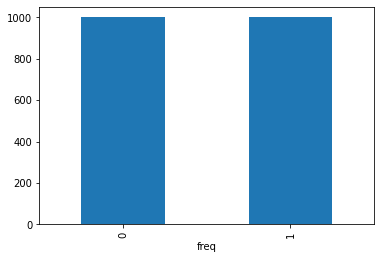

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

labelList_2class = []
for key in labels_fit_2class:
  labelList_2class.append(labels_fit_2class[key])
print(labelList_2class)
print(len(labelList_2class))


df = pd.DataFrame({'freq': labelList_2class})
df.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
300


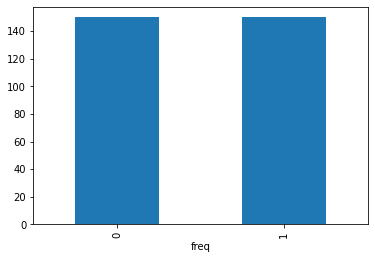

In [ ]:
labelList_2class = []
for key in labels_eval_2class:
  labelList_2class.append(labels_eval_2class[key])
print(labelList_2class)
print(len(labelList_2class))


df = pd.DataFrame({'freq': labelList_2class})
df.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

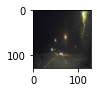

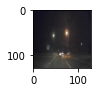

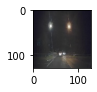

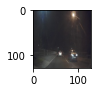

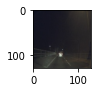

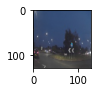

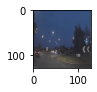

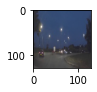

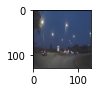

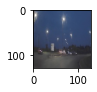

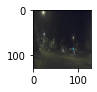

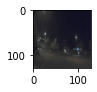

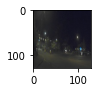

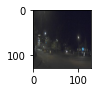

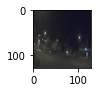

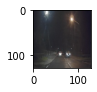

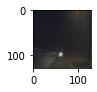

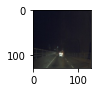

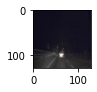

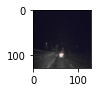

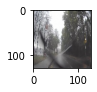

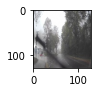

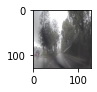

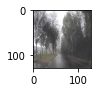

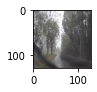

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization, Embedding, AveragePooling3D, ConvLSTM2D
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt


# Parameters
params = {'dim': (5, 128, 128),
      'batch_size': 5,
      'n_classes': 2,
      'n_channels': 3,
      'shuffle': True}

# Generators
training_generator_2class = DataGenerator(partition_fit_2class['train'], labels_fit_2class, **params)
validation_generator_2class = DataGenerator(partition_fit_2class['validation'], labels_fit_2class, **params)
evaluation_generator_2class = EvalDataGenerator(partition_eval_2class['evaluate'], labels_eval_2class, **params)

for i in validation_generator_2class.__getitem__(0)[0]:
    for j in range(1, len(i)+1):
      plt.subplot(1,5,j)
      plt.imshow(i[j-1])
      plt.show()


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

numClass = '2'
date = '29_8'
ver = '01'

input_shape = (5, 128, 128, 3)
num_classes = 2
model_2class = Sequential()
model_2class.add(Conv3D(4, kernel_size=(2, 3, 3), activation='relu', input_shape=input_shape)) # input shape only here
model_2class.add(MaxPooling3D(pool_size=(1, 2, 2)))
model_2class.add(Dropout(0.5)) # dropout = 0.25 is OK to start with
model_2class.add(Conv3D(8, kernel_size=(1, 3, 3), activation='relu')) # kernel_size = (1, 3, 3)
model_2class.add(MaxPooling3D(pool_size=(1, 2, 2))) # subsamples in x and y which will reduce parameters considerably at each layer
model_2class.add(Dropout(0.5))
model_2class.add(Flatten())
model_2class.add(Dense(128, activation='relu')) # start with a small hidden layer
model_2class.add(Dense(num_classes, activation='softmax'))

model_2class.summary() # check the numbers of parameters at each layers

my_lr = 1e-4

model_2class.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.binary_accuracy])

es = EarlyStopping(monitor='val_binary_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint(str("/content/gdrive/My Drive/Stress/Models/"+ numClass +"class/"+ numClass +"class_"+ date +"_(" + ver + ")_best_model.h5"), monitor='val_binary_accuracy', mode='max', verbose=1, save_best_only = True)

# Train model on dataset
history = model_2class.fit_generator(generator=training_generator_2class,
                    validation_data=validation_generator_2class,
                    use_multiprocessing=False,
                    workers=6,
                    epochs = 50,
                    callbacks=[es, mc])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 4, 126, 126, 4)    220       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 4, 63, 63, 4)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 63, 63, 4)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 4, 61, 61, 8)      296       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 4, 30, 30, 8)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 30, 30, 8)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

In [ ]:
# serialize model to JSON
model_2class_json = model_2class.to_json()
with open(str("/content/gdrive/My Drive/Stress/Models/"+ numClass +"class/"+ numClass +"class_"+ date +"_(" + ver + ")_best_model.json"), "w") as json_file:
    json_file.write(model_2class_json)

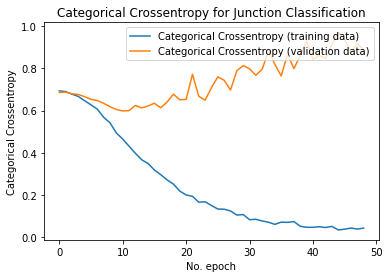

In [ ]:
# Plot history: Mean Squared Error
plt.plot(history.history['loss'][1:], label='Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'][1:], label='Categorical Crossentropy (validation data)')
plt.title("Categorical Crossentropy for Junction Classification")
plt.ylabel('Categorical Crossentropy')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.savefig(str("/content/gdrive/My Drive/Stress/2classHistory.png"))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import math
import matplotlib.pyplot as plt

crossEnt, acc_long= model_2class.evaluate_generator(generator=evaluation_generator_2class)
acc = round(acc_long, 2)
print(crossEnt)
print(acc)

y_pred_2class = np.argmax(model_2class.predict(x_eval_2class), axis=-1)
print(y_pred_2class)
print(classification_report(y_eval_2class, y_pred_2class))


1.2203052043914795
0.59
[1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 1]
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       150
           1       0.58      0.62      0.60       150

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300



In [ ]:
dir = str("/content/gdrive/My Drive/Stress/Models/"+ numClass +"class/"+ numClass +"class_"+ date +"_(" + ver + ")_"+ str(acc))

In [ ]:
# serialize model to JSON
model_2class_json = model_2class.to_json()
with open(str(dir + '.json'), "w") as json_file:
    json_file.write(model_2class_json)
# serialize weights to HDF5
model_2class.save_weights(str(dir + ".h5"))
print("Saved model to disk")

Saved model to disk


In [ ]:
from sklearn.metrics import classification_report
dir = str("/content/gdrive/My Drive/Stress/Models/2class/2class_26_8_(03)_best_model")

my_lr = 1e-4

# load json and create model
json_file = open(str(dir + '.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(str(dir + ".h5"))
print("Loaded model from disk")

loaded_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=my_lr),
              metrics=[keras.metrics.binary_accuracy])
y_pred_2class= np.argmax(loaded_model.predict(x_eval_2class), axis=-1)
print(y_pred_2class)
print(classification_report(y_eval_2class, y_pred_2class))


crossEnt, acc_long= loaded_model.evaluate_generator(generator=evaluation_generator_2class)
acc = round(acc_long, 2)
print(crossEnt)
print(acc)

loaded_model.summary()

Loaded model from disk
[0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 1 1 1]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       150
           1       0.69      0.63      0.66       150

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300

0.7242304086685181
0.67
Model: "sequenti